In [204]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import chart_studio.plotly as py
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
import plotly
import plotly.graph_objs as go
# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

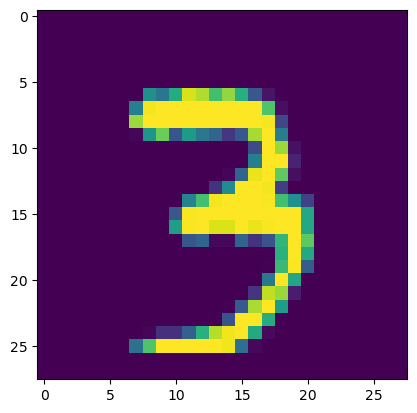

In [7]:
plt.imshow(x_train[2917])

In [8]:
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [9]:
x_train[2900][10][16]

0

In [11]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [191]:
class myRecall(tf.keras.metrics.Recall):
    name="Recall_C"
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.argmax(y_pred,1)
        return super(myRecall,self).update_state(y_true,y_pred,sample_weight)

In [192]:
class myPrecision(tf.keras.metrics.Precision):
    name="Precision_C"
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.argmax(y_pred,1)
        return super(myPrecision,self).update_state(y_true,y_pred,sample_weight)

In [231]:
def iplot_curve(epochs,hist,list_of_metrics):
    fig = go.Figure()
    for m in list_of_metrics:
        x = hist[m]
        val_acc=hist[f'val_{m}']
        
        fig.add_trace(go.Scatter(x=epochs[1:],y=val_acc[1:],mode="lines",name=f"val_{m}"))
        fig.add_trace(go.Scatter(x=epochs[1:], y=x[1:],
                    mode='lines',
                    name=m))
        fig.update_layout(title='Performance Metrics Evaluation',
                   xaxis_title="Epochs",
                   yaxis_title='Value')
    fig.show()

In [225]:
def plot_curve(epochs, hist, list_of_metrics):
  #"""Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        val_acc=hist[f'val_{m}'] #i do want to add accuracy here
        plt.plot(epochs[1:], x[1:], label=m)
        plt.plot(epochs[1:],val_acc[1:],label=f"val_{m}")
    plt.ylim(0.84,1.05)
    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [197]:
def create_model(my_learning_rate):
  #"""Create and compile a deep neural net."""
  
  # All models in this course are sequential.
    model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a one-dimensional 
  # 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))
    
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy',myPrecision(),myRecall()])
  
    return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  #"""Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist    
print("Model Created Successfully!")

Model Created Successfully!


In [261]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy',"Precision_C","Recall_C"]
iplot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)
preed=my_model.predict(x=x_test_normalized)
results=preed.argmax(axis=1)

Epoch 1/50
12/12 [==============================] - 1s 41ms/step - loss: 1.0286 - accuracy: 0.6815 - Precision_C: 0.9788 - Recall_C: 0.9454 - val_loss: 0.3431 - val_accuracy: 0.8987 - val_Precision_C: 0.9944 - val_Recall_C: 0.9950
Epoch 2/50
12/12 [==============================] - 0s 25ms/step - loss: 0.3838 - accuracy: 0.8853 - Precision_C: 0.9936 - Recall_C: 0.9926 - val_loss: 0.2423 - val_accuracy: 0.9292 - val_Precision_C: 0.9969 - val_Recall_C: 0.9949
Epoch 3/50
12/12 [==============================] - 0s 25ms/step - loss: 0.2665 - accuracy: 0.9212 - Precision_C: 0.9960 - Recall_C: 0.9948 - val_loss: 0.1860 - val_accuracy: 0.9467 - val_Precision_C: 0.9973 - val_Recall_C: 0.9961
Epoch 4/50
12/12 [==============================] - 0s 25ms/step - loss: 0.2100 - accuracy: 0.9379 - Precision_C: 0.9968 - Recall_C: 0.9958 - val_loss: 0.1553 - val_accuracy: 0.9548 - val_Precision_C: 0.9978 - val_Recall_C: 0.9969
Epoch 5/50
12/12 [==============================] - 0s 25ms/step - loss: 0.1

12/12 [==============================] - 0s 25ms/step - loss: 0.0171 - accuracy: 0.9945 - Precision_C: 0.9996 - Recall_C: 0.9997 - val_loss: 0.0803 - val_accuracy: 0.9801 - val_Precision_C: 0.9986 - val_Recall_C: 0.9984
Epoch 37/50
12/12 [==============================] - 0s 26ms/step - loss: 0.0165 - accuracy: 0.9948 - Precision_C: 0.9998 - Recall_C: 0.9997 - val_loss: 0.0795 - val_accuracy: 0.9794 - val_Precision_C: 0.9986 - val_Recall_C: 0.9982
Epoch 38/50
12/12 [==============================] - 0s 27ms/step - loss: 0.0153 - accuracy: 0.9951 - Precision_C: 0.9998 - Recall_C: 0.9997 - val_loss: 0.0796 - val_accuracy: 0.9802 - val_Precision_C: 0.9987 - val_Recall_C: 0.9987
Epoch 39/50
12/12 [==============================] - 0s 27ms/step - loss: 0.0157 - accuracy: 0.9951 - Precision_C: 0.9996 - Recall_C: 0.9997 - val_loss: 0.0800 - val_accuracy: 0.9797 - val_Precision_C: 0.9984 - val_Recall_C: 0.9985
Epoch 40/50
12/12 [==============================] - 0s 27ms/step - loss: 0.0151 - a


 Evaluate the new model against the test set:
313/313 [==============================] - 0s 1ms/step


In [263]:
results[0]

7

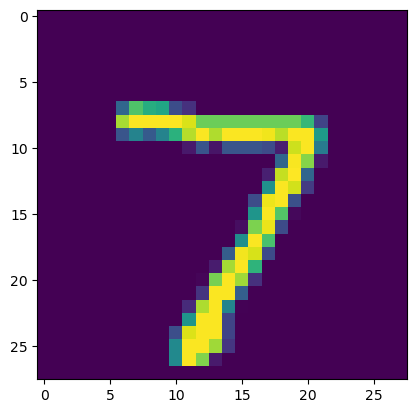

In [264]:
plt.imshow(x_test[0])